In [1]:
#%%
from vnpy.app.spread_trading.backtesting import BacktestingEngine
from vnpy.app.spread_trading.strategies.statistical_arbitrage_strategy import (
    StatisticalArbitrageStrategy
)
from vnpy.app.spread_trading.base import LegData, SpreadData
from datetime import datetime

In [2]:
spread = SpreadData(
    name="IF-Spread",
    legs=[LegData("IF1911.CFFEX"), LegData("IF1912.CFFEX")],
    price_multipliers={"IF1911.CFFEX": 1, "IF1912.CFFEX": -1},
    trading_multipliers={"IF1911.CFFEX": 1, "IF1912.CFFEX": -1},
    active_symbol="IF1911.CFFEX",
    inverse_contracts={"IF1911.CFFEX": False, "IF1912.CFFEX": False},
    min_volume=1
)

In [3]:
#%%
engine = BacktestingEngine()
engine.set_parameters(
    spread=spread,
    interval="1m",
    start=datetime(2019, 6, 10),
    end=datetime(2019, 11, 10),
    rate=0,
    slippage=0,
    size=300,
    pricetick=0.2,
    capital=1_000_000,
)
engine.add_strategy(StatisticalArbitrageStrategy, {})

2019-11-14 12:22:16.758224	开始加载历史数据
2019-11-14 12:22:20.582443	历史数据加载完成，数据量：7200
2019-09-23 11:10:00 long 0.0 -1.6 -1.595771499962582
2019-09-23 11:22:00 short 0.0 5.0 4.434537272006142
2019-09-23 11:24:00 short 0.0 5.2 4.9688499583209484
2019-09-23 11:28:00 long 0.0 -3.8 -3.695330911067618
2019-09-23 13:25:00 long 0.0 -0.4 -0.23693471309323555
2019-09-23 13:34:00 long 0.0 -1.8 -1.4179666393179509
2019-09-23 14:02:00 long 0.0 -0.8 -0.5778248012256164
2019-09-23 14:04:00 long 0.0 -1.2 -1.1925798475317886
2019-09-23 14:06:00 long 0.0 -2.0 -1.8379710609249407
2019-09-23 14:39:00 long 0.0 -2.8 -2.0334313701260256
2019-09-23 14:43:00 long 0.0 -3.4 -2.787519389787807
2019-09-23 14:57:00 long 0.0 -5.8 -4.27440470371467
2019-09-24 10:05:00 long 0.0 -3.8 -3.179999999999999
2019-09-24 10:06:00 long 0.0 -4.6 -3.857025532524194
2019-09-24 10:57:00 long 0.0 -5.0 -4.445544546049673
2019-09-24 11:25:00 short 0.0 3.2 1.6423691723275973
2019-09-24 13:17:00 long 0.0 -4.0 -3.4607215153133146
2019-09-24 1

2019-10-16 11:03:00 long 0 0.2 0.3184496572199613
2019-10-16 11:04:00 sell 10 2.0 1.25
2019-10-16 11:29:00 long 0 0.2 0.3624556746878138
2019-10-16 13:03:00 sell 10 1.6 1.2700000000000005
2019-10-16 13:31:00 short 0 4.2 3.535493654014335
2019-10-16 13:35:00 cover -10 1.8 2.1399999999999997
2019-10-16 13:52:00 short 0 3.2 2.898489166907174
2019-10-16 13:53:00 cover -10 0.8 1.339999999999999
2019-10-16 14:21:00 short 0 3.8 3.130897177907629
2019-10-16 14:33:00 cover -10 2.8 2.8999999999999995
2019-10-16 14:42:00 long 0 2.4 2.415591956721122
2019-10-16 14:47:00 sell 10 3.4 3.35
2019-10-16 14:55:00 short 0 4.4 4.259999999999998
2019-10-16 14:59:00 cover -10 2.4 3.18
2019-10-17 10:03:00 short 0 3.2 3.1397142273814165
2019-10-17 10:17:00 cover -10 3.4 3.5700000000000003
2019-10-17 10:23:00 short 0 5.6 5.342577965360736
2019-10-17 10:27:00 cover -10 4.2 4.420000000000001
2019-10-17 11:11:00 short 0 6.2 6.088117640698874
2019-10-17 11:12:00 cover -10 4.6 4.97
2019-10-17 13:25:00 long 0 4.4 4.5

2019-10-29 14:14:00 sell 10 2.8 2.3899999999999997
2019-10-29 14:40:00 short 0 4.0 3.599719056781405
2019-10-29 14:42:00 cover -10 2.6 2.7100000000000004
2019-10-30 09:32:00 long 0 1.4 1.702651193427421
2019-10-30 09:33:00 sell 10 2.6 2.5500000000000007
2019-10-30 09:40:00 short 0 3.4 3.2675848040166766
2019-10-30 09:50:00 cover -10 2.8 2.8599999999999994
2019-10-30 10:05:00 long 0 2.2 2.233116507008849
2019-10-30 10:06:00 sell 10 3.4 3.1299999999999994
2019-10-30 10:15:00 short 0 4.4 3.9870165420097914
2019-10-30 10:19:00 cover -10 2.8 3.09
2019-10-30 10:31:00 short 0 5.4 4.915457117137707
2019-10-30 10:41:00 cover -10 4.0 4.34
2019-10-30 10:52:00 long 0 3.2 3.2019246599640794
2019-10-30 11:08:00 sell 10 4.2 3.2299999999999995
2019-10-30 11:24:00 short 0 4.6 4.327174264961146
2019-10-30 11:25:00 cover -10 3.2 3.3300000000000005
2019-10-30 11:26:00 short 0 4.6 4.529233969908972
2019-10-30 13:00:00 cover -10 2.8 3.5199999999999996
2019-10-30 13:15:00 short 0 4.8 4.5817661014573865
2019-

C:\Github\vnpy\vnpy\app\spread_trading\backtesting.py:286: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  max_drawdown_start = df["balance"][:max_drawdown_end].argmax()


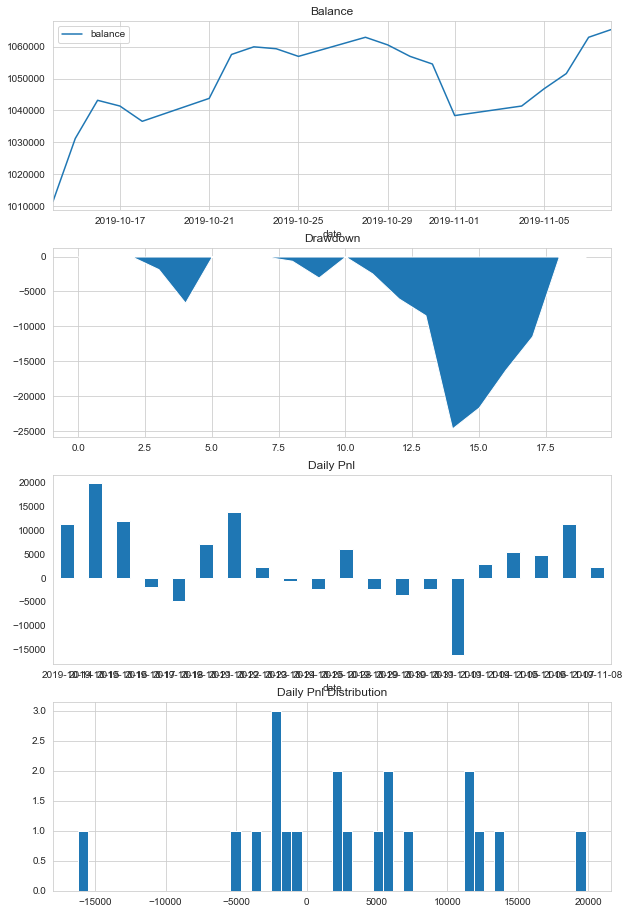

In [4]:
#%%
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

In [5]:
for trade in engine.trades.values():
    print(trade)

TradeData(gateway_name='BACKTESTING', symbol='IF-Spread', exchange=<Exchange.LOCAL: 'LOCAL'>, orderid='1', tradeid='1', direction=<Direction.SHORT: '空'>, offset=<Offset.NONE: ''>, price=5.0, volume=10, time='09:31:00')
TradeData(gateway_name='BACKTESTING', symbol='IF-Spread', exchange=<Exchange.LOCAL: 'LOCAL'>, orderid='2', tradeid='2', direction=<Direction.LONG: '多'>, offset=<Offset.NONE: ''>, price=2.0, volume=10, time='09:36:00')
TradeData(gateway_name='BACKTESTING', symbol='IF-Spread', exchange=<Exchange.LOCAL: 'LOCAL'>, orderid='4', tradeid='3', direction=<Direction.SHORT: '空'>, offset=<Offset.NONE: ''>, price=0.2, volume=10, time='10:02:00')
TradeData(gateway_name='BACKTESTING', symbol='IF-Spread', exchange=<Exchange.LOCAL: 'LOCAL'>, orderid='7', tradeid='4', direction=<Direction.LONG: '多'>, offset=<Offset.NONE: ''>, price=0.2, volume=10, time='10:06:00')
TradeData(gateway_name='BACKTESTING', symbol='IF-Spread', exchange=<Exchange.LOCAL: 'LOCAL'>, orderid='12', tradeid='5', direc